Exam 1

100 points, points for each question are in () after the question #

6 questions, some have several parts. 

Be sure to execute your code blocks to display your answer

Be sure to execute the code blocks that contain code and datasets I provided. 

Rename this notebook: your_rcsid_Exam.ipynb

(your rcsid is 6 characters)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

### 1. (15) Probability 

#### 1a. (10) Given:
P(A,D) = .2  
P(A,E) = .3  
P(B,E) = .1  
P(B) = .3  
P(C,D) = .1  

|<i></i> |D|E| <i></i>|
|-----:|-----:|:----|:----|
|A  |.2  | .3   | <i></i>|
|B  | <i></i>   | .1   | .3 |
|C  |.1  |  <i></i>    | <i></i> |
| <i></i>  | <i></i>   |  <i></i>    | 1.0

What is:  
P(A)  
P(B,D)   
P(C,E)  
P(C)  
P(C|D)

In [2]:
P_AD = .2
P_AE = .3
P_BE = .1
P_B = .3
P_CD = .1

In [3]:
P_A = .5
P_BD = .2
P_CE = .1
P_C = .2
P_C_D = .2

In [4]:
print('P(A) = ', P_A)
print('P(B,D) = ', P_BD)
print('P(C,E) = ', P_CE)
print('P(C) = ', P_C)
print('P(C|D) = ', P_C_D)

P(A) =  0.5
P(B,D) =  0.2
P(C,E) =  0.1
P(C) =  0.2
P(C|D) =  0.2


#### 1b. (2) Show C and D are independent.


In [5]:
P_D = P_AD+P_BD+P_CD
np.isclose(P_CD,P_C*P_D)


True

#### 1c. (3) What is the expected value of a die with the PMF given below. 

In [6]:
pmf = (1/6,0,1/3,1/6,0,1/3)

expectation = np.mean([pmf[i] * (i+1) for i in range(6)])
print(expectation)

0.638888888888889


### 2. (20) Linear Regression 

Sample of 78 bluegills. Age and length of the fish.

In [7]:
bg_df  = pd.read_csv('bluegill.csv')
bg_df.tail()


,age,length
73,6,170
74,4,160
75,5,180
76,4,160
77,4,170


#### 2a. (3) Create a scatterplot of length as a function of age

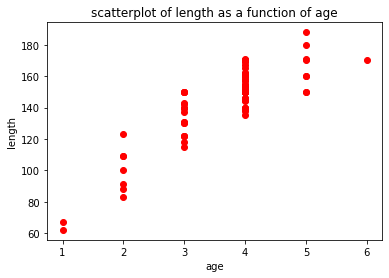

In [8]:
xlabel,ylabel = 'age','length'
plt.scatter(bg_df.age, bg_df.length, color = 'red')
plt.title(f'scatterplot of length as a function of age')
plt.xlabel(xlabel)
plt.ylabel(ylabel);



#### 2b. (9) 
Using a simple Linear Regression model of length as a function of age, output the Coefficient of Determination and the correlation of age and length. They should be equal.



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def residuals(y,yhat):
    return y - yhat

def rss(y,yhat):
    return(np.sum(residuals(y,yhat)**2))

def tss(y):
    return(np.sum((y - np.mean(y))**2))

def R_squared(y,yhat):
    return(1 - (rss(y,yhat)/tss(y)))

X=bg_df.age.values.reshape(-1,1)
y=bg_df.length.values

model = LinearRegression().fit(X,y)
ypred = model.predict(X)


print(R_squared(y,ypred))
print(model.score(X, y))

0.734882147178252
0.734882147178252


#### 2c.(8) Plot the data with the best fitting line. The title is the linear equation (replace ???? with your code).

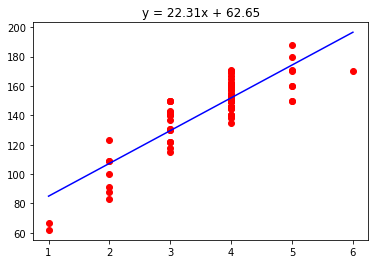

In [10]:
# Your Code Here
# Your Code Here
X_test = np.array([X.min(),X.max()]).reshape(-1,1)
yhat = model.predict(X_test)

plt.scatter(X, y, color = 'red')
plt.plot(X_test, yhat, color = 'blue')
plt.title('Regression Line')

plt.title(f'y = {model.coef_[0].round(2)}x + {model.intercept_.round(2)}');

### 3. (20) Classification

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [12]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [13]:
np.random.seed(1234)

X = penguins.iloc[:,[2,3]].values
y = penguins.species.values
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 1234,
                                                    stratify = y) ####
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(266, 2) (67, 2) (266,) (67,)


#### 3a.(2) Scale the data with standard scaling

In [14]:
sc = StandardScaler()
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scale = scaler.transform(X)

#### 3b. (6) Create a Multinomial Regression model and output the accuracy of the test data

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf = LogisticRegression().fit(X_train, y_train)
ypred = clf.predict(X_test)

def accuracy(cm):
    return np.trace(cm)/np.sum(cm)

cm = confusion_matrix(y_test, ypred)
print(f'Accuracy: {accuracy(cm)}')





Accuracy: 0.9402985074626866


#### 3c. (6)
Create a Support Vector Machine Classifier with a linear kernel. Set the probability keyword to True. Output the accuracy

In [16]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', probability = True).fit(X_train, y_train)
ypred = clf.predict(X_test)

def accuracy(cm):
    return np.trace(cm)/np.sum(cm)

cm = confusion_matrix(y_test, ypred)
print(f'Accuracy: {accuracy(cm)}')

Accuracy: 0.9402985074626866


#### 3d. (4)

Using the SVM Classifier predict a new observation with bill_length_mm = 50 and bill_depth_mm = 15.0

In [17]:
sample = np.array([50, 15]).reshape(-1,2)
sample_pred = clf.predict(sample)
print(f'The prediction is {labelencoder.inverse_transform(sample_pred)[0]}')

The prediction is Gentoo


#### 3e. (2) 
Using the SVM Classifier, what is the probability of the new observation is class 0.

In [18]:
prob = clf.predict_proba(sample)
prob0 = prob[0,0]
print(f'The probability of being class 0 is {prob0}')


The probability of being class 0 is 0.0009417815377945327


### 4. (16) PyTorch

4a. (6) Fill in the ???? with your code to create an linear input layer with 8 nodes and an linear output layer with 1 node

In [22]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn

x=bg_df.age.values.reshape(-1,1)
y=bg_df.length.values.reshape(-1,1)
scalerx = MinMaxScaler()
x=scalerx.fit_transform(x)
scalery = MinMaxScaler()
y=scalery.fit_transform(y)

x_t=torch.from_numpy(x.astype(np.float32))
y_t=torch.from_numpy(y.astype(np.float32))

class Model(nn.Module):
    def __init__(self,num_in,num_out):
        super(Model, self).__init__()
        self.input =  nn.Linear(num_in, 8)  
        self.output = nn.Linear(8, num_out)  
        
    def forward(self,input):
        return (self.output(self.input(input)))
    
model = Model(x_t.shape[1],1) 
model

Model(
  (input): Linear(in_features=1, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)

4b. (4) 
Fill in ???? to create a Mean Squared error loss and a Stochastic Gradient Descent optimizer with learning rate of .1

In [23]:
criterion = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) 
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)

#### 4c.(4) Fill in the ???? to complete the training loop

In [24]:
torch.manual_seed(1)

n_epochs = 10

train_losses = np.zeros(n_epochs)

for i in range(n_epochs):

    optimizer.zero_grad()  # zero the parameter gradients
    outputs = model(x_t) # Forward pass 
    loss = criterion(outputs, y_t) # Calculate loss
    loss.backward()     # Backward pass
    optimizer.step()       # Update weights
    train_losses[i] = loss.item() # Log loss
    
    
    print(f'Epoch {i+1}/{n_epochs}, Train Loss: {loss.item():.4f}')

Epoch 1/10, Train Loss: 0.4438
Epoch 2/10, Train Loss: 0.1967
Epoch 3/10, Train Loss: 0.0900
Epoch 4/10, Train Loss: 0.0468
Epoch 5/10, Train Loss: 0.0305
Epoch 6/10, Train Loss: 0.0245
Epoch 7/10, Train Loss: 0.0223
Epoch 8/10, Train Loss: 0.0213
Epoch 9/10, Train Loss: 0.0208
Epoch 10/10, Train Loss: 0.0204


#### 4d. (2) Fill in the ???? to predict  new value for age of 3.5.

In [25]:
x_new = scalerx.transform(np.array([3.5],dtype=np.float32).reshape(-1,1))
x_new = torch.from_numpy(x_new)
pred = model(x_new)
y_pred = pred.detach().numpy()
scalery.inverse_transform(y_pred.reshape(-1,1))

array([[143.22897]], dtype=float32)

### 5. (11) Linear Algebra

#### 5a. (5) Given the matrix M.  
Show that the sum of the eigenvalues equals the trace of the matrix.

In [26]:
M = np.array([[1,2,3],[17,14,2],[8,8,5]])

print(f'The trace is {np.trace(M)}')
print(f'The sum of eigen-value is {np.linalg.eig(M)[0].sum()}')




The trace is 20
The sum of eigen-value is 19.999999999999986


#### 5b. (6)

In [27]:
mpg = sns.load_dataset('mpg',data_home='./seaborn-data')
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


Show that for Linear Regression there is a closed form solution for the parameters by showing that evaluating the Normal equation produces the same parameters as a Linear Regression model. You can just print them to visually compare them.

In [28]:
# Create the Design Matrix

X=np.ones((mpg.mpg.size,3))
X[:,[1,2]] = mpg.loc[:,['displacement','weight']].values
y = mpg.mpg.values
X.shape,y.shape

((398, 3), (398,))

In [29]:
# Your Code Here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X, y)

print(f'The coefficients of linear regression model are {reg.coef_, reg.intercept_}\n')

print(f'The coefficients of normal equation are {np.linalg.inv(X.T@X)@X.T@y}')


The coefficients of linear regression model are (array([ 0.        , -0.01635835, -0.00579774]), 43.90046375787348)

The coefficients of normal equation are [ 4.39004638e+01 -1.63583529e-02 -5.79774419e-03]


### 6. (18) Short Answer

Replace ???? with your answer

a. The coefficients of Logistic Regression represent

The linear coefficient of the logit model

b. The Dot product is a measure of 

distance or similarity

c. Which of the following are assumptions of the Ordinary Least Squares Method of Linear Regression:

a. The errors have constant variance.  
b. The distribution of the errors has mean 0.  
c. The errors are independent.   
d. The errors are correlated with the predictors.

abc

d. The middle line of a plot box represents the

median

e. Given:  
y = stats.norm.pdf(2.0)  
True or False: y is the probability of a Normal random variable at the value 2.0

False, it is the probability density

f. A high Precision value means your model 

is accurate on all the predictions it made.

In [27]:
#Given:
v2 = stats.norm.rvs(loc=0,scale = 5,size = 1000)  
a,b = np.var(v2),np.var(v2,ddof=1)

g. Which one is the sample variance

b is the sample vairance as it allows degree of freedom = 1

h. The sigmoid activation function is no longer the most popular method for a hidden layer because 

it leads to gradient vanishing

i. The output of the softmax function sums to 1 because

All the possibilities of the numerator sums to the denomiator.